In [1]:
# Import dependencies
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Read 2020 and 2021 merged survey data
merged_df = pd.read_csv('merged_data.csv',encoding='cp1252',index_col=0)
merged_df.head()

,response id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [3]:
# Drop "response id" column, which repeats for each data set
merged_df = merged_df.drop(['response id'],axis=1)

In [4]:
# Create a new column with index values
merged_df['responder_id'] = merged_df.index
merged_df.head()

,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,rw percentage (2020),...,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities,responder_id
0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,90%,...,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,0
1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,...,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,1
2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,50% - I spent about half of my time remote wor...,...,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,2
3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,100% - I spent all of my time remote working,...,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,3
4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,90%,...,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0,4


In [5]:
# shift column 'responder_id' to first position
first_column = merged_df.pop('responder_id')

# insert column using insert(position,column_name,
# first_column) function
merged_df.insert(0, 'responder_id', first_column)

merged_df.head()

,responder_id,birth year,gender,industry desc,occupation desc,organization size,manage others?,household,years at job,metro or regional,...,if no covid: i would have choice about rw,productivity (remote vs office),in-person: hours commuting,in-person: hours working,in-person: hours personal/family time,in-person: hours domestic responsibilities,remote: hours commuting,remote: hours working,remote: hours personal/family time,remote: hours domestic responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [6]:
# Convert spaces in column headers to underscores
merged_df.columns = merged_df.columns.str.replace(' ', '_')

# Remove right parentheses in column headers 
merged_df.columns = merged_df.columns.str.replace(')', '')

# Remove left parentheses in column headers
merged_df.columns = merged_df.columns.str.replace('(', '')

# Removed Dashes in column headers
merged_df.columns = merged_df.columns.str.replace('-', '')

# Remove colon in column headers
merged_df.columns = merged_df.columns.str.replace(':', '')

# Convert slash in column headers to underscores
merged_df.columns = merged_df.columns.str.replace('/', '_')

# Remove question marks from column headers
merged_df.columns = merged_df.columns.str.replace('?', '')

# Remove underscore at the end of column names
merged_df = merged_df.rename(columns=
               {'inperson_hours__commuting_': 'inperson_hours__commuting',
                'remote_hours_commuting_': 'remote_hours_commuting', 
                'if_no_covid_employer_encourage_rw_' : 'if_no_covid_employer_encourage_rw'})



/var/folders/gy/6h2clhrx0hzb66lz_nz8r25r0000gn/T/ipykernel_9572/4264269273.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df.columns = merged_df.columns.str.replace(')', '')
/var/folders/gy/6h2clhrx0hzb66lz_nz8r25r0000gn/T/ipykernel_9572/4264269273.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df.columns = merged_df.columns.str.replace('(', '')
/var/folders/gy/6h2clhrx0hzb66lz_nz8r25r0000gn/T/ipykernel_9572/4264269273.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  merged_df.columns = merged

In [7]:
# Confirm headers have been changed
merged_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,13.0,2.0,0.0,6.0,15.0,3.0


In [8]:
# Check data types of all columns
merged_df.dtypes

responder_id                                  int64
birth_year                                    int64
gender                                       object
industry_desc                                object
occupation_desc                              object
organization_size                            object
manage_others                                object
household                                    object
years_at_job                                 object
metro_or_regional                            object
rw_percentage_2020                           object
org_encouraged_rw                            object
org_prepared_for_rw                          object
rw_is_common_at_org                          object
rw_permission_is_attainable                  object
rw_collaboration_easy                        object
preferred_rw_percentage_2020                 object
preferred_rw_percentage_future               object
if_no_covid_employer_encourage_rw            object
if_no_covid_

In [9]:
# Check for duplicate rows
merged_df.duplicated().sum()

0

# Examine null values 

In [10]:
# Check for null values in each column
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column responder_id has 0 null values
Column birth_year has 0 null values
Column gender has 0 null values
Column industry_desc has 0 null values
Column occupation_desc has 0 null values
Column organization_size has 0 null values
Column manage_others has 136 null values
Column household has 0 null values
Column years_at_job has 0 null values
Column metro_or_regional has 0 null values
Column rw_percentage_2020 has 0 null values
Column org_encouraged_rw has 31 null values
Column org_prepared_for_rw has 31 null values
Column rw_is_common_at_org has 31 null values
Column rw_permission_is_attainable has 31 null values
Column rw_collaboration_easy has 31 null values
Column preferred_rw_percentage_2020 has 0 null values
Column preferred_rw_percentage_future has 136 null values
Column if_no_covid_employer_encourage_rw has 0 null values
Column if_no_covid_employer_support_rw has 0 null values
Column if_no_covid_i_would_have_choice_about_rw has 0 null values
Column productivity_remote_vs_office h

In [11]:
# If a response to a question is left blank for categorical responses, replace it with "no response"
object_columns = ["manage_others",
                 "org_encouraged_rw",
                 "org_prepared_for_rw",
                 "rw_is_common_at_org",
                 "rw_permission_is_attainable",
                 "rw_collaboration_easy",
                 "preferred_rw_percentage_2020",
                 "preferred_rw_percentage_future"]
merged_df[object_columns] = merged_df[object_columns].fillna("No response")

In [12]:
# See columns with float datatype
merged_df.select_dtypes(include=[np.float64]).columns

Index(['inperson_hours__commuting', 'inperson_hours__working',
       'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities'],
      dtype='object')

In [13]:
# Check for null values in float columns
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column inperson_hours__commuting has 3 null values
Column inperson_hours__working has 3 null values
Column inperson_hours__personal_family_time has 5 null values
Column inperson_hours_domestic_responsibilities has 17 null values
Column remote_hours_commuting has 24 null values
Column remote_hours_working has 3 null values
Column remote_hours_personal_family_time has 7 null values
Column remote_hours_domestic_responsibilities has 18 null values


In [14]:
## Find the median value of each column with a float64 datatype.
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column {column} has a median of {merged_df[column].median()}")

Column inperson_hours__commuting has a median of 2.0
Column inperson_hours__working has a median of 8.0
Column inperson_hours__personal_family_time has a median of 3.5
Column inperson_hours_domestic_responsibilities has a median of 2.0
Column remote_hours_commuting has a median of 0.5
Column remote_hours_working has a median of 8.0
Column remote_hours_personal_family_time has a median of 4.0
Column remote_hours_domestic_responsibilities has a median of 2.5


In [15]:
# replace all null values with the column's median in merged_df
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    merged_df[column] = merged_df[column].fillna(merged_df[column].median())

In [16]:
# Check null values again to confirm they've been replaced for both object and float64 datatypes
for column in merged_df.columns:
    print(f"Column {column} has {merged_df[column].isnull().sum()} null values")

Column responder_id has 0 null values
Column birth_year has 0 null values
Column gender has 0 null values
Column industry_desc has 0 null values
Column occupation_desc has 0 null values
Column organization_size has 0 null values
Column manage_others has 0 null values
Column household has 0 null values
Column years_at_job has 0 null values
Column metro_or_regional has 0 null values
Column rw_percentage_2020 has 0 null values
Column org_encouraged_rw has 0 null values
Column org_prepared_for_rw has 0 null values
Column rw_is_common_at_org has 0 null values
Column rw_permission_is_attainable has 0 null values
Column rw_collaboration_easy has 0 null values
Column preferred_rw_percentage_2020 has 0 null values
Column preferred_rw_percentage_future has 0 null values
Column if_no_covid_employer_encourage_rw has 0 null values
Column if_no_covid_employer_support_rw has 0 null values
Column if_no_covid_i_would_have_choice_about_rw has 0 null values
Column productivity_remote_vs_office has 0 null

# Assess outliers in float columns 

<Axes: >

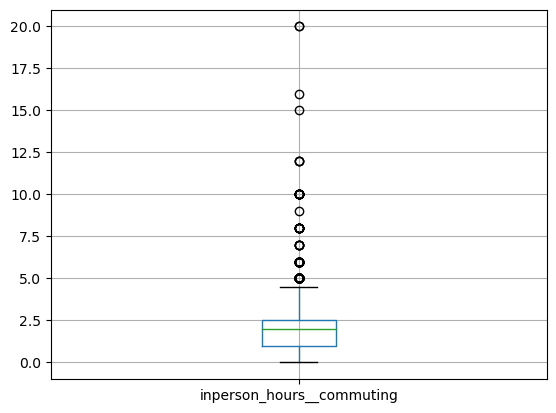

In [17]:
# Generate boxplot to examine outliers for 'inperson_hours__commuting'
merged_df.boxplot(column = 'inperson_hours__commuting')

<Axes: >

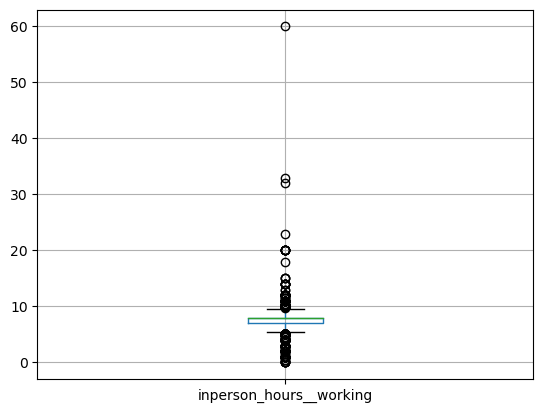

In [18]:
# Generate boxplot to examine outliers for 'inperson_hours__working'
merged_df.boxplot(column = 'inperson_hours__working')

<Axes: >

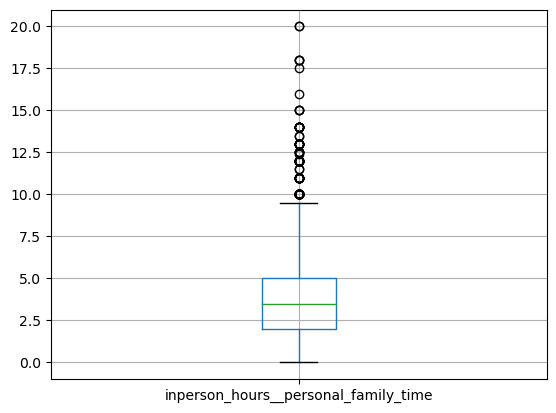

In [19]:
# Generate boxplot to examine outliers for 'inperson_hours__personal_family_time'
merged_df.boxplot(column = 'inperson_hours__personal_family_time')

<Axes: >

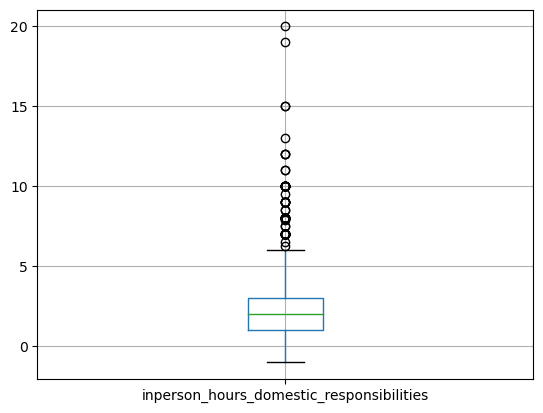

In [20]:
# Generate boxplot to examine outliers for 'inperson_hours_domestic_responsibilities'
merged_df.boxplot(column = 'inperson_hours_domestic_responsibilities')

<Axes: >

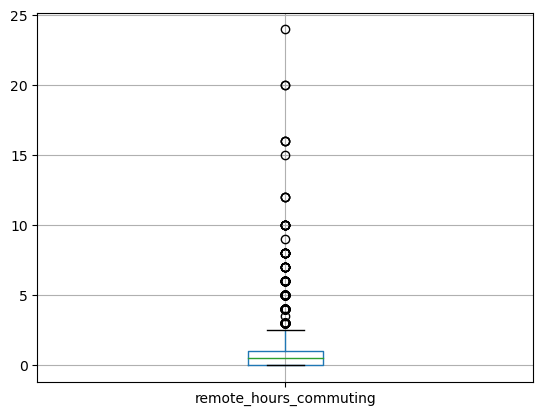

In [21]:
# Generate boxplot to examine outliers for 'remote_hours_commuting'
merged_df.boxplot(column = 'remote_hours_commuting')

<Axes: >

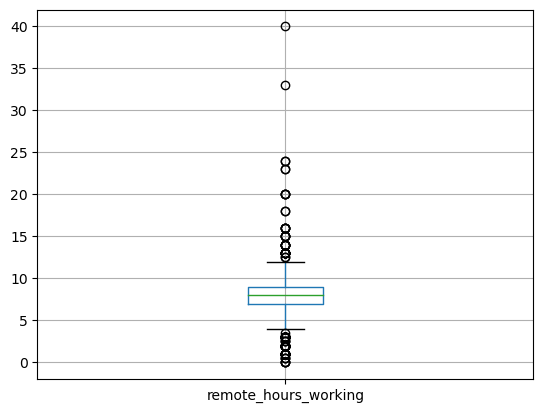

In [22]:
# Generate boxplot to examine outliers for 'remote_hours_working'
merged_df.boxplot(column = 'remote_hours_working')

<Axes: >

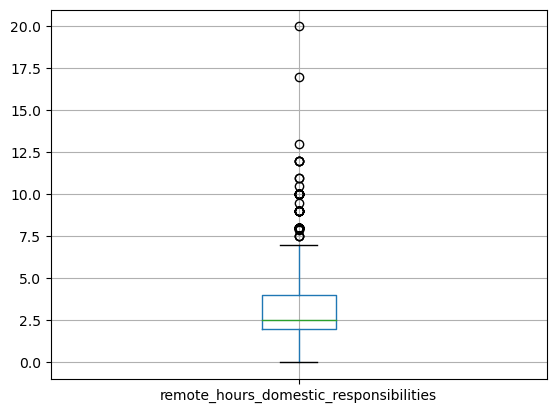

In [23]:
# Generate boxplot to examine outliers for 'remote_hours_domestic_responsibilities'
merged_df.boxplot(column = 'remote_hours_domestic_responsibilities')

<Axes: >

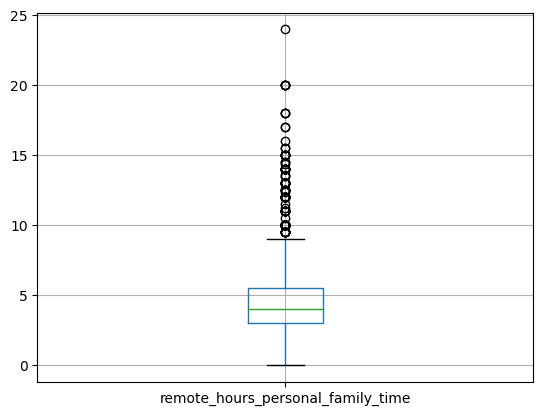

In [24]:
# Generate boxplot to examine outliers for 'remote_hours_personal_family_time'
merged_df.boxplot(column = 'remote_hours_personal_family_time')

In [25]:
## Print the range of values for each float64 column
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column range in {column}: min: {merged_df[column].min()} max: {merged_df[column].max()}")

Column range in inperson_hours__commuting: min: 0.0 max: 20.0
Column range in inperson_hours__working: min: 0.0 max: 60.0
Column range in inperson_hours__personal_family_time: min: 0.0 max: 20.0
Column range in inperson_hours_domestic_responsibilities: min: -1.0 max: 20.0
Column range in remote_hours_commuting: min: 0.0 max: 24.0
Column range in remote_hours_working: min: 0.0 max: 40.0
Column range in remote_hours_personal_family_time: min: 0.0 max: 24.0
Column range in remote_hours_domestic_responsibilities: min: 0.0 max: 20.0


In [26]:
## From the boxplot distributions, all of the float64 type columns seem to contain outliers.
## Calculate the number of outliers for each float64 column if the response is an outlier more than 3 standard deviations beyond the mean

for column in merged_df.select_dtypes(include=[np.float64]).columns:
    
    Min = merged_df[column].mean() - (3*merged_df[column].std())
    Max = merged_df[column].mean() + (3*merged_df[column].std())
    
    outliers = [x for x in merged_df[column] if x < Min or x > Max]
    print(f"Identified outliers in {column}: %d" % len(outliers))

Identified outliers in inperson_hours__commuting: 38
Identified outliers in inperson_hours__working: 24
Identified outliers in inperson_hours__personal_family_time: 71
Identified outliers in inperson_hours_domestic_responsibilities: 39
Identified outliers in remote_hours_commuting: 72
Identified outliers in remote_hours_working: 24
Identified outliers in remote_hours_personal_family_time: 57
Identified outliers in remote_hours_domestic_responsibilities: 40


In [27]:
## If the response is an outlier more than 3 standard deviations beyond the mean, reset the value to the column's median
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    Min = merged_df[column].mean() - (3*merged_df[column].std())
    Max = merged_df[column].mean() + (3*merged_df[column].std())
    for x in merged_df[column]:
        if x < Min or x > Max:
            merged_df[column]=merged_df[column].replace(x,merged_df[column].median())
        else:
            merged_df[column]=merged_df[column]


In [28]:
## Print the range of values for each float64 column to confirm extreme outliers have been corrected
for column in merged_df.select_dtypes(include=[np.float64]).columns:
    print(f"Column range in {column}: min: {merged_df[column].min()} max: {merged_df[column].max()}")

Column range in inperson_hours__commuting: min: 0.0 max: 6.0
Column range in inperson_hours__working: min: 1.0 max: 14.0
Column range in inperson_hours__personal_family_time: min: 0.0 max: 11.0
Column range in inperson_hours_domestic_responsibilities: min: -1.0 max: 8.0
Column range in remote_hours_commuting: min: 0.0 max: 5.0
Column range in remote_hours_working: min: 1.0 max: 15.0
Column range in remote_hours_personal_family_time: min: 0.0 max: 12.0
Column range in remote_hours_domestic_responsibilities: min: 0.0 max: 8.0


In [29]:
# Display dataframe with changes
merged_df

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,Iâ€™m 50% more productive when working remotel...,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 20% less productive when working remotely,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,Iâ€™m 10% less productive when working remotely,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,My productivity is about same when I work remo...,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,Iâ€™m 20% more productive when working remotely,1.0,8.0,3.5,2.0,0.0,6.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,3014,1995,Male,Wholesale Trade,"Managers - Chief Executives, General Managers ...",Between 5 and 19,Yes,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat likely,Iâ€™m 30% more productive when working remotely,2.0,8.0,3.0,4.0,3.0,8.0,3.0,3.0
3015,3015,1993,Female,Health Care and Social Assistance,Professionals - Health Professionals,Between 5 and 19,Yes,Multiple family household,More than 5 years,Metro,...,Very unlikely,My productivity is about same when I work remo...,3.0,10.0,2.0,2.0,1.0,8.0,4.0,3.0
3016,3016,1979,Female,Administrative and Support,Clerical and administrative workers - Clerical...,Between 20 and 199,No,One parent family with dependent children,More than 5 years,Regional,...,Very unlikely,My productivity is about same when I work remo...,3.0,7.0,2.0,4.0,1.0,7.0,4.0,4.0
3017,3017,1965,Female,Education and Training,"Managers - Chief Executives, General Managers ...",Between 1 and 4,Yes,Couple with no dependent children,More than 5 years,Metro,...,Somewhat likely,My productivity is about same when I work remo...,1.0,7.0,4.0,4.0,0.5,7.0,4.5,4.0


## Examine variables for bucketing

In [30]:
# Generate our categorical variable list
merged_df_cat = merged_df.dtypes[merged_df.dtypes == "object"].index.tolist()

In [31]:
# Check the number of unique values in each column
merged_df[merged_df_cat].nunique()

gender                                       5
industry_desc                               26
occupation_desc                             50
organization_size                            6
manage_others                                3
household                                    8
years_at_job                                 3
metro_or_regional                            2
rw_percentage_2020                          13
org_encouraged_rw                            6
org_prepared_for_rw                          6
rw_is_common_at_org                          6
rw_permission_is_attainable                  6
rw_collaboration_easy                        6
preferred_rw_percentage_2020                13
preferred_rw_percentage_future              14
if_no_covid_employer_encourage_rw           10
if_no_covid_employer_support_rw             10
if_no_covid_i_would_have_choice_about_rw    10
productivity_remote_vs_office               12
dtype: int64

In [ ]:
## Based on the counts above, the following categorical variables have over 10 unique values and need to be bucketed before encoding: 
# industry_desc
# occupation_desc
# rw_percentage_(2020)
# preferred_rw_percentage_(2020)
# preferred_rw_percentage_(future)
# productivity_(remote_vs_office)

In [32]:
# Print the number of industries in the industry_desc column
industry_counts = merged_df.industry_desc.value_counts()
industry_counts

Education and Training                             294
Information Media and Telecommunications           263
Professional, Scientific and Technical Services    259
Other Services                                     222
Health Care and Social Assistance                  219
Financial and Insurance                            204
Retail Trade                                       173
Financial and Insurance Services                   173
Professional, Scientific and Technical             163
Manufacturing                                      149
Public Administration and Safety                   147
Construction                                       127
Transport, Postal and Warehousing                  104
Wholesale Trade                                     94
Administrative and Support Services                 76
Administrative and Support                          70
Arts and Recreation Services                        38
Arts and Recreation                                 35
Accommodat

<Axes: ylabel='Density'>

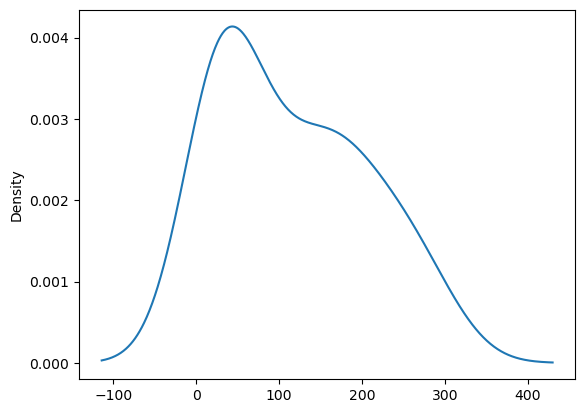

In [33]:
# Visualize the value counts
industry_counts.plot.density()

In [34]:
# Determine which values to replace
replace_industries = list(industry_counts[industry_counts < 150].index)

# Replace in DataFrame
for industry in replace_industries:
    merged_df.industry_desc = merged_df.industry_desc.replace(industry,"Other")

# Check to make sure binning was successful
merged_df.industry_desc.value_counts()

Other                                              1049
Education and Training                              294
Information Media and Telecommunications            263
Professional, Scientific and Technical Services     259
Other Services                                      222
Health Care and Social Assistance                   219
Financial and Insurance                             204
Retail Trade                                        173
Financial and Insurance Services                    173
Professional, Scientific and Technical              163
Name: industry_desc, dtype: int64

In [35]:
# Print the number of occupations in the occupation_desc column
occupation_counts = merged_df.occupation_desc.value_counts()
occupation_counts

Professionals                                                                               580
Managers                                                                                    503
Managers - Specialist Managers                                                              240
Clerical and administrative                                                                 223
Managers - Chief Executives, General Managers and Legislators                               191
Professionals - Business, Human Resource and Marketing Professionals                        166
Professionals - ICT Professionals                                                           108
Professionals - Education Professionals                                                     103
Sales                                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals                     76
Technicians and trades                  

<Axes: ylabel='Density'>

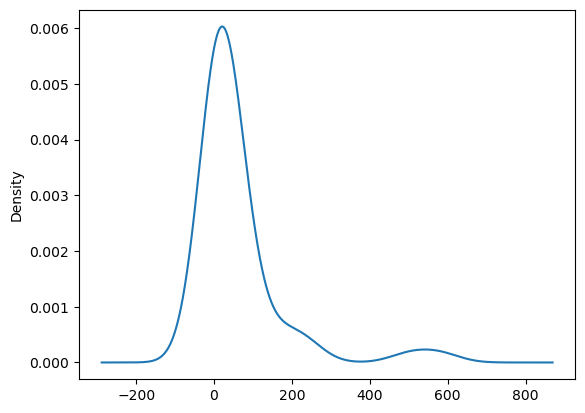

In [36]:
# Visualize the value counts
occupation_counts.plot.density()

In [37]:
# Determine which values to replace
replace_occupations = list(occupation_counts[occupation_counts < 75].index)

# Replace in DataFrame
for occupation in replace_occupations:
    merged_df.occupation_desc = merged_df.occupation_desc.replace(occupation,"Other")

# Check to make sure binning was successful
merged_df.occupation_desc.value_counts()

Other                                                                       750
Professionals                                                               580
Managers                                                                    503
Managers - Specialist Managers                                              240
Clerical and administrative                                                 223
Managers - Chief Executives, General Managers and Legislators               191
Professionals - Business, Human Resource and Marketing Professionals        166
Professionals - ICT Professionals                                           108
Professionals - Education Professionals                                     103
Sales                                                                        79
Professionals - Design, Engineering, Science and Transport Professionals     76
Name: occupation_desc, dtype: int64

In [38]:
# Examine rw_percentage_(2020) responses - 
# Survey Question: Thinking about your current job, how much of your time did you spend remote working in the last 3 months?
merged_df['rw_percentage_2020'].value_counts()

100% - I spent all of my time remote working          909
50% - I spent about half of my time remote working    319
90%                                                   257
20%                                                   250
80%                                                   211
Less than 10% of my time                              207
30%                                                   179
40%                                                   162
10%                                                   136
60%                                                   135
70%                                                   126
Rarely or never                                        97
Rarely or never                                        31
Name: rw_percentage_2020, dtype: int64

In [39]:
## Convert rw_percentage_(2020) responses to the number of remote workdays per week

rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'Rarely or never':'0-1 days',
                          'Rarely or never ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - I spent about half of my time remote working':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - I spent all of my time remote working':'4-5 days'}

merged_df['rw_percentage_2020']= merged_df['rw_percentage_2020'].map(rw_percentage_2020_map)

In [40]:
# Confirm new response counts
merged_df['rw_percentage_2020'].value_counts()

4-5 days    1377
2-3 days     481
0-1 days     471
1-2 days     429
3-4 days     261
Name: rw_percentage_2020, dtype: int64

In [41]:
# Examine preferred rw percentage (future) responses -
# Survey Question: "How much of your work time would you have preferred to work remotely during the last quarter of last year?   
# This means October-December 2020  
# If you work a 5 day week, each day of remote working equals 20% of your time.
merged_df['preferred_rw_percentage_2020'].value_counts()

100% - All of my time                           861
50% - About half of my time                     500
20%                                             242
80%                                             240
90%                                             190
40%                                             174
60%                                             153
70%                                             146
Less than 10% of my time                        131
30%                                             126
10%                                             103
I would not have preferred to work remotely      91
I would not have preferred to work remotely      62
Name: preferred_rw_percentage_2020, dtype: int64

In [42]:

preferred_rw_percentage_2020_map = {'Less than 10% of my time':'0-1 days',
                          'I would not have preferred to work remotely':'0-1 days',
                          'I would not have preferred to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

merged_df['preferred_rw_percentage_2020']= merged_df['preferred_rw_percentage_2020'].map(preferred_rw_percentage_2020_map)

In [43]:
# Confirm new response counts to preferred_rw_percentage_(2020)
merged_df['preferred_rw_percentage_2020'].value_counts()

4-5 days    1291
2-3 days     674
0-1 days     387
1-2 days     368
3-4 days     299
Name: preferred_rw_percentage_2020, dtype: int64

In [44]:
# Examine preferred rw percentage (future) responses - 
# Survey Question: "Imagine that COVID-19 is cured or eradicated.   
# Going forward, how much of your work time would you prefer to work remotely?  
# If you work a 5 day week, each day of remote working equals 20% of your time."
merged_df['preferred_rw_percentage_future'].value_counts()

50% - About half of my time             583
100% - All of my time                   390
20%                                     284
80%                                     253
40%                                     219
60%                                     211
30%                                     172
70%                                     167
90%                                     158
Less than 10% of my time                139
No response                             136
I would prefer not to work remotely     110
10%                                     108
I would prefer not to work remotely      89
Name: preferred_rw_percentage_future, dtype: int64

In [45]:
preferred_rw_percentage_future_map = {'Less than 10% of my time':'0-1 days',
                          'I would prefer not to work remotely':'0-1 days',
                          'I would prefer not to work remotely ':'0-1 days',
                          '10%':'0-1 days',
                          '20%':'1-2 days',
                          '30%':'1-2 days',
                          '40%':'2-3 days',
                          '50% - About half of my time':'2-3 days',
                          '60%':'3-4 days',
                          '70%':'3-4 days',
                          '80%':'4-5 days',
                          '90%':'4-5 days',
                          '100% - All of my time':'4-5 days',
                          'No response':'No response'}

merged_df['preferred_rw_percentage_future']= merged_df['preferred_rw_percentage_future'].map(preferred_rw_percentage_future_map)

In [46]:
# Confirm new response counts to preferred_rw_percentage_(future)
merged_df['preferred_rw_percentage_future'].value_counts()

2-3 days       802
4-5 days       801
1-2 days       456
0-1 days       446
3-4 days       378
No response    136
Name: preferred_rw_percentage_future, dtype: int64

In [47]:
# Examine productivity_(remote_vs_office) responses - 
# Survey Question: "This question is about your productivity. Productivity means what you produce for each hour that you work. It includes the amount of work you achieve each hour, and the quality of your work each hour.  
# Please compare your productivity when you work remotely to when you work at your employerís workplace.  
# Roughly how productive are you, each hour, when you work remotely?"
merged_df['productivity_remote_vs_office'].value_counts()

My productivity is about same when I work remotely            767
Iâ€™m 50% more productive when working remotely (or more)     498
Iâ€™m 20% more productive when working remotely               437
Iâ€™m 30% more productive when working remotely               430
Iâ€™m 10% more productive when working remotely               212
Iâ€™m 40% more productive when working remotely               195
Iâ€™m 10% less productive when working remotely               168
Iâ€™m 20% less productive when working remotely               164
Iâ€™m 30% less productive when working remotely                81
Iâ€™m 50% less productive when working remotely (or less)      27
Iâ€™m 50% less productive when working remotely (or worse)     23
Iâ€™m 40% less productive when working remotely                17
Name: productivity_remote_vs_office, dtype: int64

In [48]:
productivity_remote_vs_office_map = {'Iâ€™m 50% more productive when working remotely (or more)':'much more productive',
                          'Iâ€™m 40% more productive when working remotely':'much more productive',
                          'Iâ€™m 30% more productive when working remotely':'much more productive',
                          'Iâ€™m 20% more productive when working remotely':'more productive',
                          'Iâ€™m 10% more productive when working remotely':'more productive',
                          'My productivity is about same when I work remotely':'same productivity',
                          'Iâ€™m 10% less productive when working remotely':'less productive',
                          'Iâ€™m 20% less productive when working remotely':'less productive',
                          'Iâ€™m 30% less productive when working remotely':'much less productive',
                          'Iâ€™m 40% less productive when working remotely':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or less)':'much less productive',
                          'Iâ€™m 50% less productive when working remotely (or worse)':'much less productive'}

merged_df['productivity_remote_vs_office']= merged_df['productivity_remote_vs_office'].map(productivity_remote_vs_office_map)

In [49]:
# Confirm new response counts to productivity_(remote_vs_office)
merged_df['productivity_remote_vs_office'].value_counts()

much more productive    1123
same productivity        767
more productive          649
less productive          332
much less productive     148
Name: productivity_remote_vs_office, dtype: int64

In [50]:
# Check dataframe changes
merged_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,if_no_covid_i_would_have_choice_about_rw,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,Strongly disagree,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0
1,1,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,Somewhat agree,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0
2,2,1982,Male,Other,Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,Somewhat agree,less productive,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,Somewhat agree,same productivity,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0
4,4,1991,Male,Other,Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,Strongly disagree,more productive,1.0,8.0,3.5,2.0,0.0,6.0,4.0,3.0


## Adding variables 

In [51]:
# Add a variable representing the time difference spend on commuting between in-person and remote commute
merged_df['commute_time_difference'] = merged_df['inperson_hours__commuting']-merged_df['remote_hours_commuting']

In [52]:
# Confirm new column was added
merged_df.columns

Index(['responder_id', 'birth_year', 'gender', 'industry_desc',
       'occupation_desc', 'organization_size', 'manage_others', 'household',
       'years_at_job', 'metro_or_regional', 'rw_percentage_2020',
       'org_encouraged_rw', 'org_prepared_for_rw', 'rw_is_common_at_org',
       'rw_permission_is_attainable', 'rw_collaboration_easy',
       'preferred_rw_percentage_2020', 'preferred_rw_percentage_future',
       'if_no_covid_employer_encourage_rw', 'if_no_covid_employer_support_rw',
       'if_no_covid_i_would_have_choice_about_rw',
       'productivity_remote_vs_office', 'inperson_hours__commuting',
       'inperson_hours__working', 'inperson_hours__personal_family_time',
       'inperson_hours_domestic_responsibilities', 'remote_hours_commuting',
       'remote_hours_working', 'remote_hours_personal_family_time',
       'remote_hours_domestic_responsibilities', 'commute_time_difference'],
      dtype='object')

In [53]:
merged_df['commute_time_difference'].describe()

count    3019.000000
mean        1.189238
std         1.302889
min        -5.000000
25%         0.250000
50%         1.000000
75%         2.000000
max         6.000000
Name: commute_time_difference, dtype: float64

In [54]:
merged_df.head()

,responder_id,birth_year,gender,industry_desc,occupation_desc,organization_size,manage_others,household,years_at_job,metro_or_regional,...,productivity_remote_vs_office,inperson_hours__commuting,inperson_hours__working,inperson_hours__personal_family_time,inperson_hours_domestic_responsibilities,remote_hours_commuting,remote_hours_working,remote_hours_personal_family_time,remote_hours_domestic_responsibilities,commute_time_difference
0,0,1972,Female,Other,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,...,much more productive,2.0,8.0,2.0,2.0,0.5,8.0,3.5,2.0,1.5
1,1,1972,Male,Other,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,...,less productive,2.0,7.0,3.0,3.0,0.0,7.0,3.0,3.0,2.0
2,2,1982,Male,Other,Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,...,less productive,6.0,1.0,6.0,5.0,5.0,2.0,7.0,7.0,1.0
3,3,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,...,same productivity,1.0,9.0,1.0,2.0,0.0,9.0,3.0,2.0,1.0
4,4,1991,Male,Other,Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,...,more productive,1.0,8.0,3.5,2.0,0.0,6.0,4.0,3.0,1.0


In [55]:
# Save cleaned dataframe as csv file
merged_df.to_csv("merged_df_cleaned_040323.csv", index=False)

## Encode categorical data

In [56]:
# Updated merged_df_cat variable with binned values
merged_df[merged_df_cat].nunique()

gender                                       5
industry_desc                               10
occupation_desc                             11
organization_size                            6
manage_others                                3
household                                    8
years_at_job                                 3
metro_or_regional                            2
rw_percentage_2020                           5
org_encouraged_rw                            6
org_prepared_for_rw                          6
rw_is_common_at_org                          6
rw_permission_is_attainable                  6
rw_collaboration_easy                        6
preferred_rw_percentage_2020                 5
preferred_rw_percentage_future               6
if_no_covid_employer_encourage_rw           10
if_no_covid_employer_support_rw             10
if_no_covid_i_would_have_choice_about_rw    10
productivity_remote_vs_office                5
dtype: int64

In [ ]:
# Import dependencies
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged_df[merged_df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names_out(merged_df_cat)
encode_df.head()

In [ ]:
# Merge one-hot encoded features and drop the originals
merged_enc_df = merged_df.merge(encode_df,left_index=True, right_index=True)
merged_enc_df.head()

In [ ]:
# Save encoded dataframes as csv files
merged_enc_df.to_csv("merged_encoded_df.csv")